<a href="https://colab.research.google.com/github/ZD1wang/MAIS/blob/master/MAIS202_W2020_CodingChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAIS 202 Winter 2020 Coding Challenge

[Application](http://tiny.cc/mais202-w2020-app)

[Course Syllabus](http://tiny.cc/mais202-w2020-syllabus)

## Instructions
 Make a copy of this notebook into your personal google drive account.
Make sure to make this notebook public by 11:59 pm, Janurary 7th, 2020 in order to be evaluated.
If you have any questions regarding this challenge, please reach out to us through our [Facebook Page](https://www.facebook.com/McGillAI/).

## Questions
* [Part 1](#scrollTo=QYskRrWJEwZH)
* [Part 2 Task 1](#scrollTo=yl9IKD31K-J0)
* [Part 2 Task 2](#scrollTo=t_xY3228qPmP)

## Part 1

This part asks you to analyze a dataset using libraries.
To learn more about movies grosses, we have provided you with two csv's: `movies_data.csv` and `genre_data.csv`.
The urls to the files are
```
https://raw.githubusercontent.com/kayguxe/MF/master/genre_data.csv
```
and
```
https://raw.githubusercontent.com/kayguxe/MF/master/movies_data.csv
```
The file `movies_data.csv` contains information about movies such as their title, imdb rating, length, rank, rating, studio, worldwide gross, and year in a comma seperated format as shown below.
![CSV example 1](https://user-images.githubusercontent.com/10730760/71313653-b9478880-2409-11ea-8745-a58909dcbd0f.png)

The file `genre_data.csv` contains the genre for each movie in the `movies_data.csv` file, as shown below.
![CSV example 2](https://user-images.githubusercontent.com/10730760/71313662-d3816680-2409-11ea-94c7-6795663ef8e3.png)

Your challenge is as follows:

1. In the provided cell, load the datasets from their urls, parse the information and determine the average worldwide gross for each of the genres using the **pandas** library. https://pandas.pydata.org/.
2. Plot the results onto a graph using the **matplotlib** library. https://matplotlib.org/.

**Note.** You are not allowed to use other libraries, and you are required to write all the code in the following cell. You are also not allowed to run bash commands. You must use the libraries we ask you to use.



  Main_Genre  worldwide_gross
0     Action     4.032829e+08
1  Animation     3.790071e+08
2    Fantasy     8.568844e+08
3     Horror     3.274817e+08
4      Music     3.518679e+08
5    Romance     2.011514e+08
6     Sci-Fi     7.115287e+08


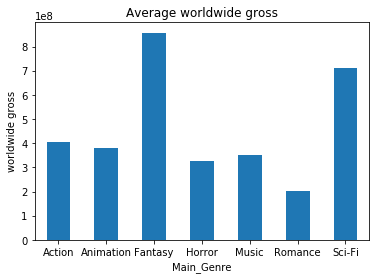

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

#read csv files
genre_data = pd.read_csv('https://raw.githubusercontent.com/kayguxe/MF/master/genre_data.csv')
movies_data = pd.read_csv('https://raw.githubusercontent.com/kayguxe/MF/master/movies_data.csv', usecols=[0,6])

#organise dataframes
movies_data.worldwide_gross = movies_data.worldwide_gross.str.replace('\$|,','')
movies_data.worldwide_gross = pd.to_numeric(movies_data.worldwide_gross)
merged = pd.merge(genre_data, movies_data, how='left', on='title')
df = merged.loc[:,['Main_Genre','worldwide_gross']]

#get the average worldwide gross for each genre
avg_worldwide_gross = merged.groupby(['Main_Genre'], as_index=False).mean()
print(avg_worldwide_gross)

#plot results onto a bar graph with x and y labels
ax = avg_worldwide_gross.plot(x = 'Main_Genre', y = 'worldwide_gross', kind='bar', title='Average worldwide gross', legend=False, rot=0)	
ax.set_xlabel('Main_Genre')
ax.set_ylabel('worldwide gross')
plt.show()

The output of the cell should be similar to the results shown below.
![results1](https://user-images.githubusercontent.com/10730760/71313669-e72ccd00-2409-11ea-9abe-599df7c4d36d.png)
![results2](https://user-images.githubusercontent.com/10730760/71313671-f01d9e80-2409-11ea-8582-068cf4371e10.png)

## Part 2

For the second half of the coding challenge, you are not allowed to use libraries.
More specifically, you are not allowed to use imported code from the standard library nor from external libraries.

### First Task

Your first task is to write a helper function `to_grade_point` which converts a grade out of 100 into a `tuple` whose first entry is a string representing the letter grade and whose second entry is a float representing the Grade Points.


![Letter Grade Table](https://i.ibb.co/WnvbXL1/table.png)


**Note.** Inputs are assumed to be valid. That is, inputs will be integers from 0 to 100 inclusive.

In [0]:
def to_grade_point(grade):
  if grade < 60:
    return ("F", 0.0)
  elif grade < 65:
    return ("C+", 2.3)
  elif grade < 70:
    return ("B-", 2.7)
  elif grade < 75:
    return ("B", 3.0)
  elif grade < 80:
    return ("B+", 3.3)
  elif grade < 85:
    return ("A-", 3.7)
  else:
    return ("A", 4.0)
  

You can test your code with the following snippet.
If your code is correct, you should see

![Example Code 1](https://i.ibb.co/4F9mP9Y/code1.png)

In [0]:
for grade in [0, 99, 80, 85, 84, 60, 59, 74]:
  print("{} -> {}".format(grade, to_grade_point(grade)))

0 -> ('F', 0.0)
99 -> ('A', 4.0)
80 -> ('A-', 3.7)
85 -> ('A', 4.0)
84 -> ('A-', 3.7)
60 -> ('C+', 2.3)
59 -> ('F', 0.0)
74 -> ('B', 3.0)


### Second Task

Your second task is to write a class named `GradeRecords` with a certain specification.
This part will use the helper function defined in the first part so make sure to do that first.

A `GradeRecords` object has the following attributes:
* `term`, a string representing the current semester;
* `grades`, a `list` object containing `tuples`, where the first entry of each tuple is a string representing the code of the class, the second entry of each tuple is the grade out of 100, and the third entry is the number of credits for this course. `grades` can be initialized (see below) as an empty list.
* `num_courses` an `int` which contains the number of courses in the record. This can be initialized as 0.


**Note.** You are not allowed to add more attributes.

Furthermore, a `GradeRecords` object has the following methods:
* an initialization method which takes as input the current term and initializes the three attributes;
* `add_course`, a method which takes a string representing the course code, an int for the grade out of 100 and the number of credits. The method adds a new tuple to `grades`.
* `get_best_courses`, a method which takes no parameters and outputs a list of course codes with the best grades. For instance, if the best grade is a 'B', it will output all course codes with a 'B', i.e. all courses codes with a grade between 70 and 74 (inclusive). You are required to use the helper function defined in the first part.
* `get_GPA`, a method which outputs the Grade Point Average for the semester, assuming all classes all weighted by the number of credits. You are required to use the helper function from the first task. Round it to one decimal place.
* `to_dict`, a method which returns a dict whose keys are the class codes and whose corresponding values are the letter grades. Once again, you must use the helper function from the first task.

**Note.** All inputs are assumed to be valid. Particularly, you may assume there won't be duplicate class codes.

In [0]:
class GradeRecords:
  def __init__(self,term):
    self.term = term
    self.grades = list()
    self.num_courses = 0
    return

  def add_course(self, course_code, grade, number_of_credits):
    self.grades.append((course_code, grade, number_of_credits))
    self.num_courses += 1
    return

  def get_best_courses(self):
    best_course = list()
    num = 0
    for grade in self.grades:
      if grade[1] > num:
        num = grade[1]
    
    best = to_grade_point(grade[1])[0]
    for grade in self.grades:
      if to_grade_point(grade[1])[0] == best:
        best_course.append(grade[0])
    return best_course

  def get_GPA(self):
    gpa = 0
    credit = 0
    for grade in self.grades:
      gpa += to_grade_point(grade[1])[1]*grade[2]
      credit += grade[2]
    return (round(gpa/credit,1))

  def to_dict(self):
    dictionnary = dict()
    for grade in self.grades:
      dictionnary[grade[0]] = to_grade_point(grade[1])[0]
    return dictionnary


You can test your code with the following snippet. If your code is correct you should see

![code example 2](https://i.ibb.co/xCPCWyy/code2.png)

In [0]:
gr = GradeRecords("Fall 2019")
print("First batch")
print("Term: {}".format(gr.term))

gr.add_course("COMP 202", 83, 3)
gr.add_course("CLAS 203", 75, 3)
gr.add_course("LING 360", 81, 3)

print("Number of courses: {}".format(gr.num_courses))
print("Best courses: {}".format(gr.get_best_courses()))
print("GPA: {}".format(gr.get_GPA()))
print("Dictionary: {}".format(gr.to_dict()))

print() 

print("Second batch")
print("Term: {}".format(gr.term))

gr.add_course("COMP 551", 67, 4)
gr.add_course("HIST 318", 88, 3)

print("Number of courses: {}".format(gr.num_courses))
print("Best courses: {}".format(gr.get_best_courses()))
print("GPA: {}".format(gr.get_GPA()))
print("Dictionary: {}".format(gr.to_dict()))

First batch
Term: Fall 2019
Number of courses: 3
Best courses: ['COMP 202', 'LING 360']
GPA: 3.6
Dictionary: {'COMP 202': 'A-', 'CLAS 203': 'B+', 'LING 360': 'A-'}

Second batch
Term: Fall 2019
Number of courses: 5
Best courses: ['HIST 318']
GPA: 3.4
Dictionary: {'COMP 202': 'A-', 'CLAS 203': 'B+', 'LING 360': 'A-', 'COMP 551': 'B-', 'HIST 318': 'A'}
